In [1]:
##Model breakdown

## Preprocessing

In [63]:
# Import our dependencies
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import glob
import tensorflow as tf
from sklearn.datasets import make_s_curve
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import set_config
teams = [31]

In [64]:
import os
directory = os.listdir("./")
csv_files = list(filter(lambda f: f.endswith('.csv'), directory))
len(csv_files)
print(csv_files)
t = 1
print(csv_files[1])
x=0
csv_df = pd.read_csv(csv_files[1], index_col=False)
for file in csv_files:
    
    #print(file)
    #print(str(x) + " Position")
    csv_df = pd.read_csv(file, index_col=False)
    #teams[x] = file
    
    #teams.append(str(file))
    print(csv_df)
    csv_df.head(2)
    #x = x+1
#length = (len(csv_df))
#print(length)
#print(teams[200])
#print(teams[4])
#print(teams[30])
print(csv_df)



['table_TOR.csv', 'table_CLE.csv', 'table_DEN.csv', 'table_IND.csv', 'table_NJN.csv', 'table_POR.csv', 'table_ORL.csv', 'table_NYK.csv', 'table_GSW.csv', 'table_NOP.csv', 'table_LAL.csv', 'table_HOU.csv', 'table_CHI.csv', 'table_MIA.csv', 'overall.csv', 'table_PHX.csv', 'table_SAC.csv', 'table_MIL.csv', 'table_DAL.csv', 'table_MIN.csv', 'table_MEM.csv', 'table_WAS.csv', 'table_SAS.csv', 'table_PHI.csv', 'table_BOS.csv', 'table_CHA.csv', 'table_LAC.csv', 'table_UTA.csv', 'table_OKC.csv', 'table_DET.csv', 'table_ATL.csv']
table_CLE.csv
     G     MP     FG    FGA    FG%     3P    3PA    3P%     2P    2PA  ...  \
0   60 -0.161 -0.153 -0.144 -0.005 -0.292 -0.266 -0.013 -0.073 -0.046  ...   
1   72 -0.004 -0.013  0.008 -0.010  0.046  0.063 -0.006 -0.044 -0.032  ...   
2   72 -0.126 -0.163 -0.133 -0.016 -0.020 -0.039  0.007 -0.222 -0.191  ...   
3   82  0.003  0.023  0.019  0.002  0.049  0.024  0.008  0.012  0.016  ...   
4   82  0.003  0.054  0.036  0.008  0.335  0.355 -0.005 -0.029 -0.093 

In [65]:
joined_files = os.path.join("table*.csv")

In [66]:
joined_list = glob.glob(joined_files)

In [111]:
joined_list

['table_TOR.csv',
 'table_CLE.csv',
 'table_DEN.csv',
 'table_IND.csv',
 'table_NJN.csv',
 'table_POR.csv',
 'table_ORL.csv',
 'table_NYK.csv',
 'table_GSW.csv',
 'table_NOP.csv',
 'table_LAL.csv',
 'table_HOU.csv',
 'table_CHI.csv',
 'table_MIA.csv',
 'table_PHX.csv',
 'table_SAC.csv',
 'table_MIL.csv',
 'table_DAL.csv',
 'table_MIN.csv',
 'table_MEM.csv',
 'table_WAS.csv',
 'table_SAS.csv',
 'table_PHI.csv',
 'table_BOS.csv',
 'table_CHA.csv',
 'table_LAC.csv',
 'table_UTA.csv',
 'table_OKC.csv',
 'table_DET.csv',
 'table_ATL.csv']

In [112]:
nba_df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(nba_df)

       G     MP     FG    FGA    FG%     3P    3PA    3P%     2P    2PA  ...  \
0     60 -0.161 -0.153 -0.144 -0.005 -0.292 -0.266 -0.013 -0.073 -0.046  ...   
1     72 -0.004 -0.013  0.008 -0.010  0.046  0.063 -0.006 -0.044 -0.032  ...   
2     72 -0.126 -0.163 -0.133 -0.016 -0.020 -0.039  0.007 -0.222 -0.191  ...   
3     82  0.003  0.023  0.019  0.002  0.049  0.024  0.008  0.012  0.016  ...   
4     82  0.003  0.054  0.036  0.008  0.335  0.355 -0.005 -0.029 -0.093  ...   
...   ..    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
1165  82  0.000  0.066  0.046  0.009  2.174  1.217  0.094  0.051  0.027  ...   
1166  82  0.004 -0.036 -0.047  0.005 -0.489 -0.436 -0.022 -0.030 -0.037  ...   
1167  82 -0.005  0.044  0.055 -0.005  0.607  0.469  0.021  0.039  0.047  ...   
1168  82 -0.003 -0.025 -0.013 -0.006  1.800  0.561  0.097 -0.030 -0.020  ...   
1169  82  0.008  0.009 -0.023  0.015 -0.231  0.093 -0.051  0.010 -0.024  ...   

        ORB    DRB    TRB    AST    STL

In [113]:
len(nba_df)

1170

In [114]:
nba_df.nunique()

G        17
MP      150
FG      343
FGA     307
FG%      84
3P      765
3PA     728
3P%     173
2P      381
2PA     380
2P%      96
FT      479
FTA     464
FT%     139
ORB     474
DRB     369
TRB     337
AST     434
STL     489
BLK     565
TOV     421
PF      411
PTS     340
W/L%    164
dtype: int64

In [115]:
nba_df.columns

Index(['G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'W/L%'],
      dtype='object')

In [116]:
nba_df.shape

(1170, 24)

In [117]:
nba_df.describe

<bound method NDFrame.describe of        G     MP     FG    FGA    FG%     3P    3PA    3P%     2P    2PA  ...  \
0     60 -0.161 -0.153 -0.144 -0.005 -0.292 -0.266 -0.013 -0.073 -0.046  ...   
1     72 -0.004 -0.013  0.008 -0.010  0.046  0.063 -0.006 -0.044 -0.032  ...   
2     72 -0.126 -0.163 -0.133 -0.016 -0.020 -0.039  0.007 -0.222 -0.191  ...   
3     82  0.003  0.023  0.019  0.002  0.049  0.024  0.008  0.012  0.016  ...   
4     82  0.003  0.054  0.036  0.008  0.335  0.355 -0.005 -0.029 -0.093  ...   
...   ..    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
1165  82  0.000  0.066  0.046  0.009  2.174  1.217  0.094  0.051  0.027  ...   
1166  82  0.004 -0.036 -0.047  0.005 -0.489 -0.436 -0.022 -0.030 -0.037  ...   
1167  82 -0.005  0.044  0.055 -0.005  0.607  0.469  0.021  0.039  0.047  ...   
1168  82 -0.003 -0.025 -0.013 -0.006  1.800  0.561  0.097 -0.030 -0.020  ...   
1169  82  0.008  0.009 -0.023  0.015 -0.231  0.093 -0.051  0.010 -0.024  ...   

     

In [118]:
X=nba_df

In [207]:
y=nba_df['PTS']

In [208]:
X, y = make_regression(n_samples=100, n_features=1, random_state=0, noise=4, bias=100.0)

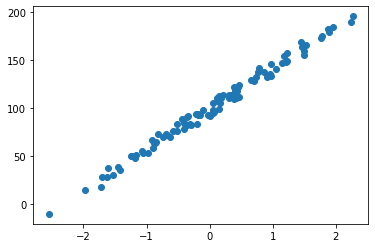

In [209]:
plt.scatter(X, y)

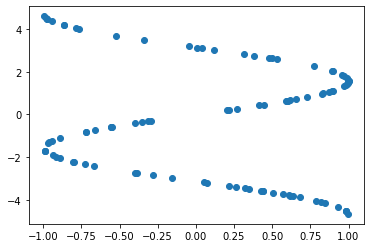

In [210]:
data, color = make_s_curve(100, random_state=0)
plt.scatter(data[:,0], color)

In [211]:
model = LinearRegression()
model

LinearRegression()

In [212]:
model.fit(X, y)
print(model)

LinearRegression()


In [213]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [42.47907503]
y-axis intercept:  99.67432726918771


In [236]:
X[0]

array([ 6.00e+01, -1.61e-01, -1.53e-01, -1.44e-01, -5.00e-03, -2.92e-01,
       -2.66e-01, -1.30e-02, -7.30e-02, -4.60e-02, -1.40e-02, -2.50e-01,
       -1.86e-01, -6.40e-02,  1.56e-01, -1.81e-01, -1.05e-01, -2.33e-01,
       -1.04e-01, -2.70e-01, -1.90e-01, -2.22e-01,  5.50e-01])

In [232]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: -0.186
Predicted output: -0.1940869784943519
Prediction Error: -0.008086978494351915


In [215]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,84.400842,82.873740,1.527101
1,141.161050,133.373112,7.787938
2,116.765428,114.854830,1.910598
3,65.132625,72.783803,-7.651178
4,61.962010,63.142196,-1.180186
...,...,...,...
95,50.179840,50.991873,-0.812033
96,84.265418,90.587920,-6.322502
97,114.812442,113.776648,1.035794
98,31.117440,37.850535,-6.733096


In [216]:
x_min = X.min()
x_max = X.max()

In [217]:
y_min_actual = y.min()
y_max_actual = y.max()

In [218]:
y_min = model.intercept_ + (model.coef_ * x_min)
y_max = model.intercept_ + (model.coef_ * x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: -10.553022965567953
Calculated Min Value: [-8.77431867]
Actual Max Value: 196.02170324014358
Calculated Max Value: [196.09140424]


In [219]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: -10.553022965567953
Predicted Min Value: [-8.77431867]
Actual Max Value: 196.02170324014358
Predicted Max Value: [196.09140424]


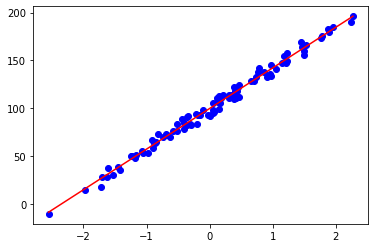

In [220]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [230]:
# Split our preprocessed data into our features and target arrays
y=nba_df['PTS'].values
X= nba_df.drop(['PTS'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=80)

In [247]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

len(y_test)

Training Score: 0.9996812298260542
Testing Score: 0.9996466365633334


293

In [250]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [252]:
predictions = model.predict(X)
print(f"Predicted PTS: {predictions[0]} ")
print(f"Actual PTS: {y[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

Predicted PTS: -0.1940869784943519 
Actual PTS: -0.186
Prediction Error: -0.008086978494351915


In [262]:
LR= LinearRegression().fit(X_train, y_train)
print(f'R-squared training Score: {LR.score(X_train_scaled, y_train)}')
print(f'R-squared testing Score: {LR.score(X_test_scaled, y_test)}')

R-squared training Score: -28.627135701902752
R-squared testing Score: -29.044739596426446


In [263]:
# Test accuracy of prediction model
y_prediction = LR.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print("mse:", mse)
print("rmse:", mse*(1/2.0)) 

mse: 1.0001980677656577e-05
rmse: 5.0009903388282885e-06


In [264]:
teams = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','BKN/NJN','NOP','NYK','OKC','ORL','PHI','PHX','POR','SAC','SAS','TOR','UTA','WAS']
predicted_df = pd.DataFrame(
    {'Team': teams})
predicted_df['PTS'] = ""
predicted_df.head()

,Team,PTS
0,ATL,
1,BOS,
2,CHA,
3,CHI,
4,CLE,


In [267]:
PTS = []
for i in range(0, len(predicted_df['Team'])):
    Score = y_prediction[i].round(decimals=3)
    PTS.append(Score)

In [269]:
predicted_df['Team'] = PTS
predicted_df

,PTS,Team
Team,,
ATL,,0.059
BOS,,-0.029
CHA,,0.004
CHI,,-0.038
CLE,,0.024
DAL,,-0.107
DEN,,0.029
DET,,0.061
GSW,,0.061


In [273]:
cptable = predicted_df.to_html()
combinedtable = cptable.replace('\n','')
combinedtable

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>    </tr>    <tr>      <th>PTS</th>    </tr>  </thead>  <tbody>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr>      <th></th>    </tr>    <tr> 